# Medical diagnostic

## Introduction
A clinic conducted a medical survey. Each patient was tagged with a list of symptoms. Some of these patients were found to have the same disease.

### Data Description
__samples.csv__:
The first column corresponds to the the patient ID (a\#) who participated to the survey. The following columns correspond to the list of codes of symptomes (s\#) that the patient exhibits.

__positives.csv__:
The list of patients (a\#) having the disease.

### Goal
- Assuming that all the subjects confirmed having the desease are the only deseased patients and the rest of the patients are healthy, estimate the accuracy of the results.
- Find additional patients in the file samples.csv, that are likely to have the same disease.

## Data Exploration and Preparation

In [1]:
# Loading csv module to read csv file
import csv

# Printing the version of csv module
print("csv version:", csv.__version__)

# Loading the symptoms table
with open('samples.csv', 'r') as f:
    reader = csv.reader(f)
    symptoms_list = list(reader)

# Printing the first three rows of the imported data
for i in range(3):
    print("\n", symptoms_list[i])

csv version: 1.0

 ['a1', 's10', 's13', 's14', 's15', 's16', 's17', 's19', 's20', 's21', 's22', 's23', 's24', 's27', 's30', 's32', 's33', 's34', 's35', 's36', 's47', 's48', 's52', 's53', 's56', 's57', 's58', 's59', 's60', 's61', 's63', 's64', 's66', 's69', 's71', 's73', 's75', 's76', 's78', 's79', 's80', 's83', 's84', 's88', 's90', 's92', 's93', 's94', 's95', 's98', 's99', 's100', 's101', 's102', 's109', 's110', 's111', 's112', 's113', 's120', 's122', 's131', 's134', 's136', 's137', 's140', 's141', 's142', 's146', 's149', 's150', 's152', 's155', 's156', 's159', 's162', 's163', 's164', 's165']

 ['a2', 's10', 's13', 's14', 's15', 's16', 's17', 's19', 's20', 's21', 's22', 's23', 's24', 's27', 's29', 's30', 's32', 's33', 's34', 's35', 's36', 's48', 's49', 's50', 's52', 's53', 's56', 's57', 's58', 's59', 's61', 's62', 's63', 's64', 's65', 's66', 's67', 's69', 's74', 's91', 's92', 's95', 's101', 's109', 's110', 's111', 's112', 's113', 's122', 's128', 's129', 's131', 's132', 's133', 's134', 

<br><br>
The data provided is in the string format (ex: 's14'). The data is categorical data, and it needs to be formatted in the numerical way for the application of machine learning algorithms. Also, the range of the provided symptoms is not available. In the code below, I created a set of all unique symptoms presented in the table.

In [2]:
# Creating a sorted set of all the unique symptoms
symptoms_set = sorted(set([item for sublist in symptoms_list for item in sublist if 's' in item]))

# Printing first 5 symptoms, and the length of the set
print("First 5 Symptoms: {0}\nSet Length: {1}".format(symptoms_set[:5], len(symptoms_set)))

First 5 Symptoms: ['s1', 's10', 's100', 's101', 's102']
Set Length: 166


<br><br>
In the cell below, I created a matrix with categorical data displayed as 0's for no symptoms and 1's for the presence of the symptoms in the patients.

In [3]:
# Creating an empty array to hold formatted patient symptoms
symptoms_matrix = []

# Looping through the symptoms list
for i in symptoms_list:
    vector = []
    # Checking the presence of the symptoms
    # If yes - 1, if no - 0
    for j in symptoms_set:
        if j not in i[1:]:
            vector.append(0)
        else:
            vector.append(1)
    # Appending the vectors into the matrix
    symptoms_matrix.append(vector)

# Printing the categorical data for the first patients
print(symptoms_matrix[:1])

[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]]


<br><br>
I used __pandas__ DataFrame for handling the data.

In [4]:
# Loading pandas module
import pandas as pd

# Printing the version of pandas module
print("pandas version:", pd.__version__)

pandas version: 0.21.0


In [5]:
# Creating DataFrame from the symptoms matrix, with the column names indicated in symptoms set
df = pd.DataFrame(data=symptoms_matrix, columns=symptoms_set)

# Re-sorting the columns
df_sorted = df.reindex(sorted(df.columns, key=lambda x: float(x[1:])), axis=1)

# Adding patients ids to the DataFrame
df_sorted['patient_id'] = [symptoms_list[i][0] for i in range(len(symptoms_list))]

# Checking the created DataFrame
df_sorted.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s158,s159,s160,s161,s162,s163,s164,s165,s166,patient_id
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,a1
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,a2
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,a3
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,a4
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,a5


<br><br>
Looking closely to the data, I observed duplicated rows in the DataFrame. The code below shows the number of duplicates.

In [6]:
# Checking for duplicates
duplicates = df_sorted.duplicated(subset=None, keep='first')
duplicates.value_counts()

False    723
True     305
dtype: int64

<br><br>
Then, I proceeded to the removal of the duplicates.

In [7]:
# Removing the duplicated rows
df_no_duplicates = df_sorted.drop_duplicates(subset=None, keep='first')
criteria_row_indices = df_no_duplicates.index
df_no_duplicates = df_no_duplicates.loc[criteria_row_indices, :]

# The new DataFrame with unique patients
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 1026
Columns: 167 entries, s1 to patient_id
dtypes: int64(166), object(1)
memory usage: 948.9+ KB


<br><br>
I loaded the table with the patients that are positive to the disease, and added a column to the symptoms DataFrame indicating the patients being positive to the disease as 1, and 0 for unknown.

In [8]:
# Reading the data into a DataFrame
positives = pd.read_csv('positives.csv', header=None)
pos = positives[0].ravel()

# Checking first 10 elements of the array
pos[:10]

array(['a5', 'a6', 'a724', 'a7', 'a13', 'a15', 'a58', 'a63', 'a73', 'a75'], dtype=object)

In [9]:
# Adding disease column to the DataFrame
df_no_duplicates['disease'] = [1 if i in pos else 0 for i in df_no_duplicates['patient_id']]

# Checking first 5 rows of the DataFrame
df_no_duplicates.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s159,s160,s161,s162,s163,s164,s165,s166,patient_id,disease
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,a1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,a2,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,a3,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,a4,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,a5,1


### Data Analysis

The data is now ready to be exploited. To make full use of the data, it is important to understand which symptoms are related to the population having the disease, and the symptoms patterns for the rest of the patients. For this, we want to plot the ratio of patients possessing each symptom for both populations: diseased and unknown. In the cell below, I grouped the number of patients having each symptom, and rescaled it by the number of patients for both populations.

In [10]:
# Grouping of the number of patients having the disease per symptom
Y_disease = df_no_duplicates.loc[df_no_duplicates['disease'] == 1].groupby(['disease']).sum()
Y_disease = Y_disease.unstack().ravel()
# Rescaling
Y_disease_scaled = Y_disease / Y_disease.max()

# Grouping of the number of patients unknown to have the disease per symptom
Y_unknown = df_no_duplicates.loc[df_no_duplicates['disease'] == 0].groupby(['disease']).sum()
Y_unknown = Y_unknown.unstack().ravel()
# Rescaling
Y_unkn_scaled = Y_unknown / Y_unknown.max()

In [11]:
# Importing modules for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy as np

# Printing the version of imported modules
print("matplotlib version:", mpl.__version__)
print("seaborn version:", seaborn.__version__)
print("numpy version:", np.__version__)

matplotlib version: 2.0.2
seaborn version: 0.8.1
numpy version: 1.12.1


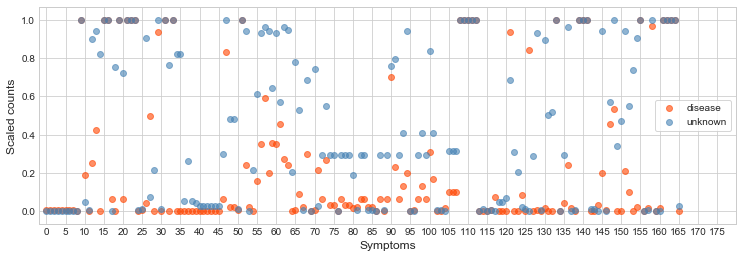

In [12]:
# Defying figure and figure size
fig, ax = plt.subplots(figsize=(12.5, 4))

# Creating an array in the range of the data
X_ax = np.arange(len(Y_disease))

# Scatter plotting the data
ax.scatter(X_ax, Y_disease_scaled, c='orangered', alpha=0.6, label='disease')
ax.scatter(X_ax, Y_unkn_scaled, c='steelblue', alpha=0.6, label='unknown')

# Additional styling for plotting
ax.set_xlabel("Symptoms", fontsize=12)
ax.set_ylabel("Scaled counts", fontsize=12)
ax.set_xlim(-2, 180)
ax.set_xticks(np.arange(0, 180, 5))

# Adding legend to the plot
ax.legend(frameon=True, loc='center right');

The plot above shows that the majority of the symptoms shared by the diseased patients are also shared by the unknown patients. From this plot, it is unclear which symptoms would be at the origin of the disease, as most of the symptoms appearing in the diseased patients are shared by less than 40% of the diseased population.

### Application of Supervised Machine Learning Algorithms

Let's assume that the patients positive to the disease are the only real positives in the dataset, and the other patients are the negatives. Therefore, we can implement classification algorithms to train on the given data, and predict the conditions of patients.

At first, I applied __Logistic Regression__ on the dataset. The dataset was split into 80% as training data and 20% as testing data.

In [13]:
# Loading scikit-learn module
import sklearn

# Printing the version of sklearn module
print("sklearn version:", sklearn.__version__)

sklearn version: 0.18.1


In [14]:
# Loading Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assigning the symptoms to X response variable
# and disease category to y response variable
X = df_no_duplicates.iloc[:, 0:166]
y = df_no_duplicates['disease']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating the model
model = LogisticRegression()

# Fitting the training data to the model
model.fit(X_train, y_train)

# Predicting the testing data using the model
pred = model.predict(X_test)

# Checking the performance of the model
accuracy_score(pred, y_test)

0.99310344827586206

<br><br>
The results of the __Logistic Regression__ shows accuracy of 99.3%. The simple model performs good under the current conditions. However, the given dataset is relatively small, and prone to overfitting. Therefore, in the given circumstances, applying the __cross-validation__ technique to this dataset is a good compromise.

In [15]:
# Loading cross-validation score
from sklearn.model_selection import cross_val_score

# Instantiating the model
model = LogisticRegression()

# Performing 5-fold cv
scores = cross_val_score(model, X, y, cv=5)

print("Scores: ", scores)
print("Accuracy: {0:0.4f} (+/- {1:0.4f})".format(scores.mean(), scores.std() * 2))

Scores:  [ 1.          0.99310345  1.          0.99305556  0.97222222]
Accuracy: 0.9917 (+/- 0.0204)


<br><br>
__Cross-validation__ score validates the results of the logistic regression and shows similar accuracy score. 

We can also implement another classification algorithm, the __Random Forrest Classifier__, to check its performance over the dataset. In the code below, I defined various parameters in order to find the optimum accuracy.

In [16]:
# Loading RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Empty array to store the results
results = []

# Various parameters for min_samples_leaf
min_sam = np.arange(2, 14, 2)
# Various parameters for n_estimators
est_values = np.arange(100, 700, 100)

# Looping through defined parameters
for est in est_values:
    for min_s in min_sam:
        # Instantiating the model
        model = RandomForestClassifier(est, oob_score=True, n_jobs=-1, random_state=42,
                                       max_features="auto", min_samples_leaf=min_s)
        # Calculating cross-validation scores
        scores = cross_val_score(model, X, y, cv=5)
        # Appending the scores into the results array
        results.append(scores.mean())

<br><br>
To display the results appropriately, I decided to make a heatmap plot of all the scores obtained for the different parameters.

In [17]:
# Using heatmap method from https://jakevdp.github.io/PythonDataScienceHandbook
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.3f"):
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

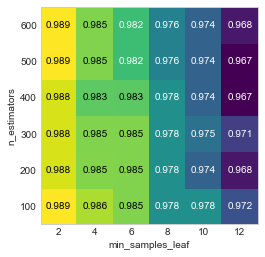

In [18]:
# Reshaping the list into 6x6 array
results_reshaped = np.array(results).reshape(6, 6)

# Plotting the heatmap of the results of Random Forest applied to CV data
heatmap(results_reshaped, xlabel='min_samples_leaf', xticklabels=min_sam,
        ylabel='n_estimators', yticklabels=est_values, cmap='viridis');

<br><br>
The heatmap plot shows that the highest scores are performed with a value for min_samples_leaf equal to 2, and with n_estimators equal to 100, 500, and 600. Here again, the __Random Forest Classifier__ shows a high accuracy of 98.9%.

### Summary of Supervised Machine Learning

The exploration of the data, through the display of the ratio population in function of the symptoms, is not conclusive. More medical information would be necessary to investigate these data.

On the other hand, assuming that the diseased population is positive and the unknown population is negative to the disease gives us excellent results using machine learning algorithm such as __Logistic Regression__ as well as  __Random Forest Classifier__.
The results from __Random Forest Classifier__ are similar to the one from the __Logistic Regression__. However, running the __Random Forest Classifier__ on the current dataset is time consuming, while the results are not better. With the size and the features of the given dataset, __Logistic Regression__ is more appropriate.

### Application of Unsupervised Machine Learning
__Unsupervised Machine Learning__ techniques like clustering algorithms can be applied to unlabeled datasets, for the grouping of similar data points in a dataset. Looking at the clustering of the dataset allow us to discover additional subjects that are likely to have the disease.

For this exercise I decided to use the hierarchical density-based clustering __HDBSCAN__ algorithm (version 0.8.10). __HDBSCAN__ is one of the best performing cluster algorithm compared to others such as k-means, agglomerative clustering, DBSCAN, etc. __HDBSCAN__ uses several steps to determine the clustering in a dataset: __kNN algorithm__, __minimum spanning tree__ from Prim's algorithm, and __hierarchical cluster analysis__ (for more details see [How HDBSCAN Works]( http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html)).

For visualization purposes, I transformed our high-dimensional data into two components using __t-distributed Stochastic Neighbor Embedding__ (t-SNE).

In [19]:
# Loading HDBSCAN and t-SNE
import hdbscan
from sklearn.manifold import TSNE

In [20]:
# Instantiating HDBSCAN with the below parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=1, alpha=1.3,
                            cluster_selection_method='leaf', gen_min_span_tree=True)
# Fitting the data to the model
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.3,
    approx_min_span_tree=True, cluster_selection_method='leaf',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=25, min_samples=1, p=None,
    prediction_data=False)

In [21]:
# Projection of the high-dimensional data into two components
projection_tsne = TSNE(random_state=6).fit_transform(X)

# Defining the color palette and applying to the clusters
color_pal = ['gold','royalblue', 'crimson','darkorchid','mediumseagreen','orange',
          'mediumvioletred','aqua', 'salmon','lime','paleturquoise','plum','rosybrown',
          'darkcyan','olive','mediumblue']
pal = seaborn.color_palette(color_pal, 30)
colors = [seaborn.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]

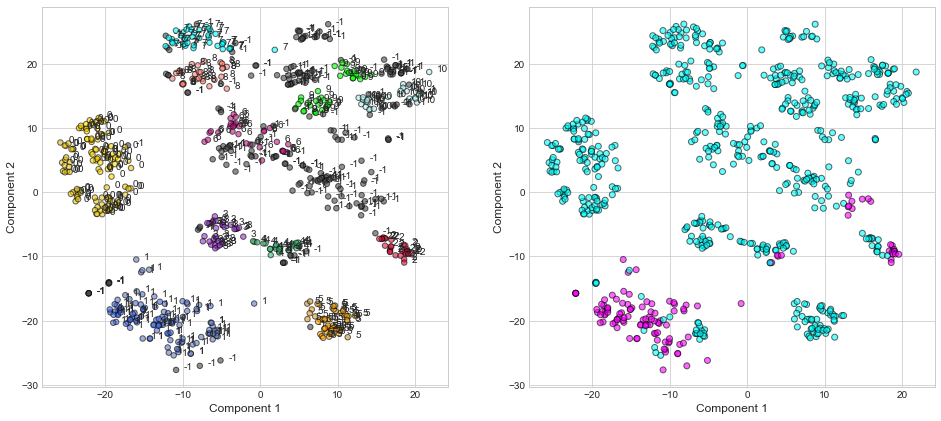

In [22]:
# Defining the figure and subplots
fig,  (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
# Plotting the results of HDBSCAN clustering with color for each cluster
ax1.scatter(*projection_tsne.T, c=colors, edgecolor='k', s=30, alpha=0.6)
# Plotting the results of HDBSCAN with color corresponding to the Disease column
ax2.scatter(*projection_tsne.T, c=y, cmap="cool", edgecolor='k', alpha=0.6)

# Additional styling for plotting
for ax in (ax1,ax2):
    ax.set_xlabel("Component 1", fontsize=12)
    ax.set_ylabel("Component 2", fontsize=12)
    
# Cluster label annotation
for i, txt in enumerate(clusterer.labels_):
    ax1.annotate(txt, (projection_tsne[i][0]+1,projection_tsne[i][1]))

<br></br>
The plot on the left shows the results from the __HDBSCAN__ algorithm. Each color corresponds to one cluster with each point annotated with label defined by __HDBSCAN__. According to __HDBSCAN__, there are 10 clusters. The label -1 correspond to noise, the rest of the points in each cluster are labeled from 0 to 10.

The plot on the right shows the same __HDBSCAN__ results, but with different color coding. The purple points correspond to the diseased patients, and the light blue points correspond to the unknown patients.

From the results of these two plots, we can observe that the diseased patients are clustered in the labeled cluster 1.
We can then determine that the light blue points located in the same cluster are potentially diseased patients.

In [23]:
# Adding the HDBSCAN labels to the DataFrame
df_no_duplicates["hdbscan_labels"] = clusterer.labels_
df_no_duplicates.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s160,s161,s162,s163,s164,s165,s166,patient_id,disease,hdbscan_labels
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a2,0,-1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a3,0,10
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a4,0,10
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a5,1,1


<br></br>
Now, we can filter through the data, and select potential diseased patients.

In [24]:
df_no_duplicates[(df_no_duplicates["disease"]==0) & (df_no_duplicates["hdbscan_labels"]==1)]

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s160,s161,s162,s163,s164,s165,s166,patient_id,disease,hdbscan_labels
35,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a34,0,1
49,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a47,0,1
124,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a115,0,1
246,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a196,0,1
251,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a200,0,1
413,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a319,0,1
423,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a327,0,1
500,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a382,0,1
640,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a475,0,1
687,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,a510,0,1


### Summary of Unsupervised Machine Learning

The hierarchical density-based clustering __HDBSCAN__ algorithm allowed us to cluster the majority of the diseased patients efficiently.
By running __HDBSCAN__ and using __t-SNE__ for visualization, we were able to determine the list of additional 22 patients that are potentially carriers of the disease.